In [1]:
"""
Max Bongers
30-6-2023
Statistical test of data for master thesis "Optimizing b-value Composition For Maximizing ADC Contrast between Cancerous and Healthy Breast Tissue using a Diffusion Weighted MRI Simulator"
"""

'\nMax Bongers\n30-6-2023\nStatistical test of data for master thesis "Optimizing b-value Composition For Maximizing ADC Contrast between Cancerous and Healthy Breast Tissue using a Diffusion Weighted MRI Simulator"\n'

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
import scipy
from scipy import stats
import numpy as np
import statsmodels.stats.multitest as multi

/home/rnga/mnbongers/tmp/ipykernel_292224/2080781342.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = merged.append(tw)


Text(0.5, 0, 'b-value')

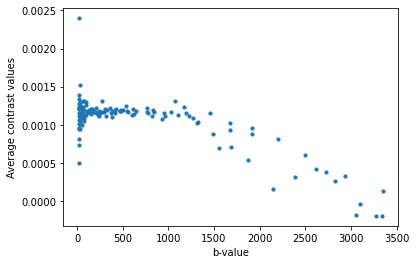

In [4]:
df3 =pd.read_csv("data/data11-15.csv")
df2 =pd.read_csv("data/data8-10.csv")
df1 =pd.read_csv("data/data6-7.csv")
df =pd.read_csv("data/data1-5.csv")
df = df[df['duration']>-1].drop(['duration'],axis=1).drop(['avg'],axis=1)
df2 = df2[df2['duration']>-1].drop(['duration'],axis=1).drop(['avg'],axis=1)
df3 = df3[df3['duration']>-1].drop(['duration'],axis=1).drop(['avg'],axis=1)
merged = pd.merge(df,df1,on=['b', 'grad_duration', 'delta', 'grad_str'],how='outer')
merged = pd.merge(merged,df2,on=['b', 'grad_duration', 'delta', 'grad_str'],how='outer')
merged = pd.merge(merged,df3,on=['b', 'grad_duration', 'delta', 'grad_str'],how='outer')
tw = pd.read_csv("data/data25000.csv")
merged = merged.append(tw)
merged1 = merged[['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13','v14','v15']]
merged['avg'] = merged1.sum(axis=1)
merged['avg'] = merged['avg'] / 15
df = merged
plt.scatter(list(df['b']),list(df['avg']), s = 10)
plt.ylabel("Average contrast values")
plt.xlabel("b-value")

In [28]:
# This cell loads and bins the data as described in the paper, currently set to test highest bin against
# other bins

df3 =pd.read_csv("data/data11-15.csv").drop(['duration'],axis=1).drop(['avg'],axis=1)
df2 =pd.read_csv("data/data8-10.csv").drop(['duration'],axis=1).drop(['avg'],axis=1)
df1 =pd.read_csv("data/data6-7.csv").drop(['duration'],axis=1).drop(['avg'],axis=1)
df =pd.read_csv("data/data1-5.csv")
df = df[df['duration']>-1].drop(['duration'],axis=1).drop(['avg'],axis=1)
merged = pd.merge(df,df1,on=['b', 'grad_duration', 'delta', 'grad_str'],how='outer')
merged = pd.merge(merged,df2,on=['b', 'grad_duration', 'delta', 'grad_str'],how='outer')
merged = pd.merge(merged,df3,on=['b', 'grad_duration', 'delta', 'grad_str'],how='outer')
XD = merged[['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13','v14','v15']]
merged['avg'] = XD.sum(axis=1)
merged['avg'] = merged['avg'] / 15
df = merged
df1 = df[df['b'] < 1500]
df1 = df1[df1['b'] > 50]
df = df1.sort_values(by=['avg'],ascending=False)


gradient_strs = ['L','M','H']
deltas = ['L','M','H']
gradient_durations = ['L','M','H']
grid1 = np.array(np.meshgrid(gradient_strs,gradient_durations,deltas)).T.reshape(-1,3)
gradient_strs = [0.049,0.05,0.1]
deltas = [20,100,500]
gradient_durations = [50,100,400]
grid = np.array(np.meshgrid(gradient_strs,gradient_durations,deltas)).T.reshape(-1,3)

df['grad_str'] = df['grad_str'].apply(lambda x: min(gradient_strs, key = lambda y:abs(y-x)))
df['delta'] = df['delta'].apply(lambda x: min(deltas, key = lambda y:abs(y-x)))
df['grad_duration'] = df['grad_duration'].apply(lambda x: min(gradient_durations, key = lambda y:abs(y-x)))

dfs = []
count = 0
temp1  = []
ranges=[]
bs = []
for i in grid:
    temp = df.loc[(df['grad_str'] == i[0]) & (df['grad_duration'] == i[1]) & (df['delta'] == i[2])]
    if len(temp) > 1:
        #print(grid1[count])
        ranges.append("-".join(grid1[count]))
        dfs.append(temp)
    temp1 = temp
        
    count+=1
    
signs = []
# ingroup significance
for i in dfs:
    sign = i[['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13','v14','v15']].values
    signs.append(sign.flatten())


sorted_indices = sorted(range(len(signs)), key=lambda x: np.mean(signs[x]))
ranges = [ranges[i] for i in sorted_indices]
signs = [signs[i] for i in sorted_indices]
dfs = [dfs[i] for i in sorted_indices]
means = []
high=[]
for i in range(len(signs)):
    high.append(signs[i].mean())
highest = np.argmax(high)
print("variances")
for i in range(len(signs)):
    print(scipy.stats.levene(signs[highest],signs[i]))
    
ps= []
for i in range(len(signs)):
    print(i)
    print("bin ",ranges[i])
    print("Mean ", signs[i].mean())
    print("Variance ", signs[i].var())
    means.append(signs[i].mean())
    if i != highest:
        print(stats.mannwhitneyu(signs[highest],signs[i]))
        ps.append(stats.mannwhitneyu(signs[highest],signs[i])[1])
    print("")

variances
LeveneResult(statistic=6.465441266687281, pvalue=0.0127474882628669)
LeveneResult(statistic=0.3408818563969437, pvalue=0.5601277151340676)
LeveneResult(statistic=30.093200898304865, pvalue=1.5447458471870996e-07)
LeveneResult(statistic=3.331652663024653, pvalue=0.07310892185383676)
LeveneResult(statistic=17.894323849203136, pvalue=4.075071956477308e-05)
LeveneResult(statistic=25.40206717317246, pvalue=2.4653447587522164e-06)
LeveneResult(statistic=19.00278662735678, pvalue=2.591427413987096e-05)
LeveneResult(statistic=15.950641042311398, pvalue=0.00018546576560534673)
LeveneResult(statistic=14.69850745308383, pvalue=0.00016413699876869516)
LeveneResult(statistic=1.0845209018907103, pvalue=0.2992305675840894)
LeveneResult(statistic=2.0196026659900705, pvalue=0.1595375929533177)
LeveneResult(statistic=0.0066793307927469694, pvalue=0.9350873379185732)
LeveneResult(statistic=2.026421885692706, pvalue=0.15884431369647645)
LeveneResult(statistic=2.0121611333549936, pvalue=0.1579520

In [29]:
# Corrected statistical tests on bins
method = 'fdr_bh'  
ps1 = list(multi.multipletests(ps, alpha=0.05, is_sorted=False, method=method)[1])
multi.multipletests(ps, alpha=0.05, is_sorted=False, method=method)

(array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False]),
 array([0.08001065, 0.13944056, 0.04524177, 0.26130326, 0.13090381,
        0.35385852, 0.60844642, 0.60844642, 0.60844642, 0.76360436,
        0.81192896, 0.76360436, 0.76360436, 0.76360436]),
 0.0036571031913835705,
 0.0035714285714285718)

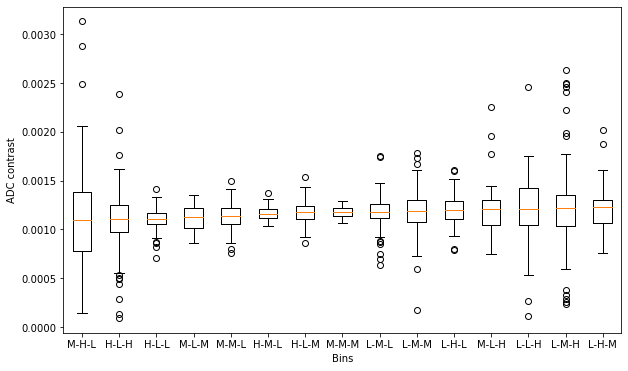

In [30]:
data = []
for i in signs:
    data.append(i)

def plot_boxplot(data, labels=None):
    fig, ax =plt.subplots(figsize=(10, 6))
    
    ax.boxplot(data, whis=1.5, usermedians = means)

    if labels is not None:
        ax.set_xticklabels(labels)
    plt.ylabel("ADC contrast")
    plt.xlabel("Bins")
    plt.show()

labels = ranges

plot_boxplot(data, labels)